<a href="https://colab.research.google.com/github/sina-salmanpour/Loan_Defaults_prediction/blob/main/Loan_Defaults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
from IPython.core.interactiveshell import InteractiveShell

Libraries initial settings

In [36]:
## Following lines are used to control how warnings are displayed.

warnings.filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=FutureWarning)  # warnings about features that will change in the future.
warnings.simplefilter(action="ignore", category=Warning)        # more general category for warnings.


## Setting below is related to how IPython displays output.
## The results of all statements in a cell that would normally be displayed are shown

InteractiveShell.ast_node_interactivity = "all"

# matplotlib plots are displayed directly within the notebook output

%matplotlib inline
np.set_printoptions(suppress=True)
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 25)
pd.set_option("display.float_format", lambda x: "%.3f" % x)


Loading Dataset

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Loan Defaults/Dataset ARCHIVE/Training Data.csv')

Checking for missing values and duplicated values

In [39]:
# Check for missing values
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Missing Values:")
    print(missing_values[missing_values > 0])

    # Calculate missing value percentages
    missing_percent = (missing_values / len(df)) * 100
    print("\nMissing Value Percentages:")
    print(missing_percent[missing_percent > 0])

No missing values found in the dataset.


In [40]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
if duplicate_rows == 0:
    print("\nNo duplicate rows found in the dataset.")
else:
    print(f"\nNumber of duplicate rows found: {duplicate_rows}")


No duplicate rows found in the dataset.


Initial inspection

In [38]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nTarget variable distribution:")
print(df['Risk_Flag'].value_counts())

Dataset Shape: (252000, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB
None

First 5 rows:
   Id   Income  Age  Experience Married/Single House_Ow

In [43]:
df.describe().T   # For Numerical variables

,count,mean,std,min,25%,50%,75%,max
Id,252000.000,126000.500,72746.278,1.000,63000.750,126000.500,189000.250,252000.000
Income,252000.000,4997116.665,2878311.014,10310.000,2503015.000,5000694.500,7477502.000,9999938.000
Age,252000.000,49.954,17.064,21.000,35.000,50.000,65.000,79.000
Experience,252000.000,10.084,6.003,0.000,5.000,10.000,15.000,20.000
CURRENT_JOB_YRS,252000.000,6.334,3.647,0.000,3.000,6.000,9.000,14.000
CURRENT_HOUSE_YRS,252000.000,11.998,1.399,10.000,11.000,12.000,13.000,14.000
Risk_Flag,252000.000,0.123,0.328,0.000,0.000,0.000,0.000,1.000


In [44]:
df.describe(include='object').T   # For categorical variables

,count,unique,top,freq
Married/Single,252000,2,single,226272
House_Ownership,252000,3,rented,231898
Car_Ownership,252000,2,no,176000
Profession,252000,51,Physician,5957
CITY,252000,317,Vijayanagaram,1259
STATE,252000,29,Uttar_Pradesh,28400


In [46]:
df2 = df.copy()   # Copy dataframe in case we need original one

In [ ]:
در چت جی پی تی در مورد این جدول توضیحاتی نوشته است که بهتر است در گزارش اورده شود که چرا همبستگی خطی برای این مسئله ضعیف بودده و با رندوم فورست میتوان غیرخطی ها را پوشش دا.

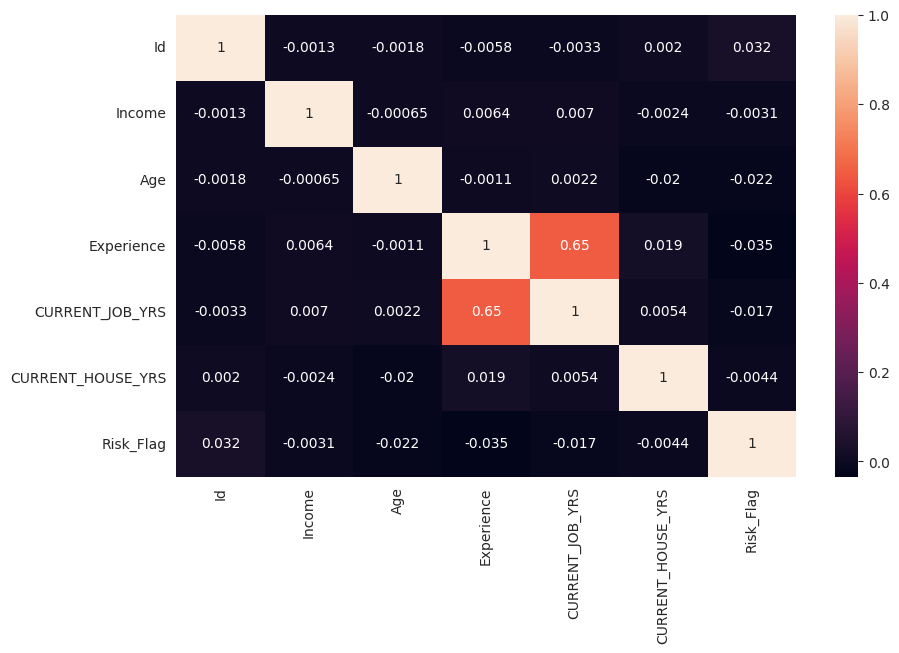

In [48]:
# Select only numerical columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)

# Calculate and plot the heatmap for numerical columns
sns.heatmap(df_numeric.corr(), annot=True);

###ID feature

In [52]:
df.drop("Id", axis=1, inplace=True)


Based on heatmap, there is no correlation between ID column and other features. It's just row identifier. WE should drop this column.

###Income

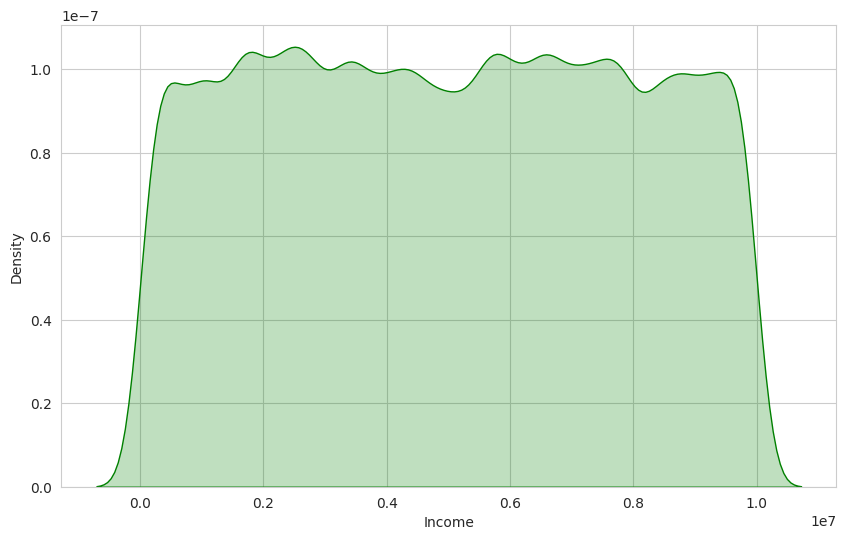

In [51]:
sns.kdeplot(df.Income, color='green',shade=True);

A KDE plot is a way to visualize the distribution of a single numerical variable. It shows the probability density function of the data, which can help you understand the shape of the distribution, identify peaks (modes), and see the spread of the data. In this case, it will show you the distribution of income values in your dataset.

In [57]:
df.groupby("Profession")["Income"].agg(["min", "max", "mean", "std"]).sort_values(by="mean", ascending=False)

"""
This line of code is performing an analysis of the Income column based on the Profession
of individuals in your dataset.
"""

,min,max,mean,std
Profession,,,,
Petroleum_Engineer,22921,9968353,5443309.827,2947683.213
Psychologist,33224,9985964,5357795.262,2815681.793
Designer,12841,9996946,5336802.230,2955188.103
Scientist,13792,9975985,5282710.423,2861046.111
Surgeon,18215,9995445,5235358.713,2831574.156
...,...,...,...,...
Civil_engineer,25674,9992141,4755441.023,2811661.895
Official,13629,9993041,4737617.356,2933763.750
Drafter,14936,9999180,4654804.628,2789440.541


'\nThis line of code is performing an analysis of the Income column based on the Profession \nof individuals in your dataset.\n'

###Married / single

In [64]:
# Renaming column to avoid trouble
df.rename(columns={"Married/Single":"Married_Single"}, inplace=True)
df.head(5)

# Marital status ( Count and Percentage)
marital_stat_c = df["Married_Single"].value_counts()
marital_stat_p = (marital_stat_c /len(df)) * 100
marital_stat = pd.concat([marital_stat_c, marital_stat_p], axis=1)
marital_stat.columns = ["Count", "Percentage"]
marital_stat

,Income,Age,Experience,Married_Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


,Count,Percentage
Married_Single,,
single,226272,89.790
married,25728,10.210


Grouping Marital status by Risk flag can give us insightful outcome.

In [80]:
# Group by 'Married_Single' and 'Risk_Flag' and count the occurrences
marital_risk_counts = df.groupby(['Married_Single', 'Risk_Flag']).size().unstack(fill_value=0).sort_values(by=1, ascending=False)

# the average risk percentage according to the marital status
marital_risk_percentages = df.groupby('Married_Single').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

# If Risk_Flag 0 means No Risk and 1 means Risk:
marital_risk_counts.columns = ['No_Risk', 'Risk']

# Display the resulting table
marital_risk_counts
marital_risk_percentages


,No_Risk,Risk
Married_Single,,
single,197912,28360
married,23092,2636


,Risk_Flag
Married_Single,
single,12.534
married,10.246


Text(0.5, 1.0, 'Distribution of the target variable according to maritial status')

[Text(0, 0, '197912'), Text(0, 0, '23092')]

[Text(0, 0, '28360'), Text(0, 0, '2636')]

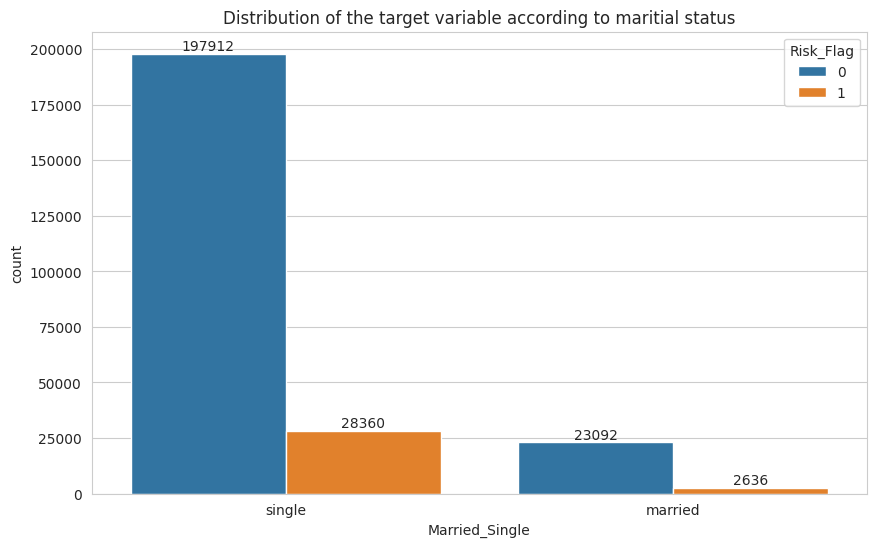

In [86]:
ax = sns.countplot(data = df , x=df["Married_Single"], hue= "Risk_Flag")
plt.title('Distribution of the target variable according to maritial status')
for p in ax.containers:
    ax.bar_label(p)